In [1]:
import gym
import math
from copy import deepcopy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
env = gym.make('CartPole-v0')
Q_table = np.zeros((2,2,8,4,2))
alpha=0.3
buckets=[2, 2, 8, 4]
gamma=0.99
rewards=[]

WARN: gym.spaces.Box autodetected dtype as <type 'numpy.float32'>. Please provide explicit dtype.


In [3]:
def toDiscreteStates(observation):
    interval=[0 for i in range(len(observation))]
    max_range=[2,3,0.42,3]	#[4.8,3.4*(10**38),0.42,3.4*(10**38)]

    for i in range(len(observation)):
        data = observation[i]
        inter = int(math.floor((data + max_range[i])/(2*max_range[i]/buckets[i])))
        if inter>=buckets[i]:
            interval[i]=buckets[i]-1
        elif inter<0:
            interval[i]=0
        else:
            interval[i]=inter
    return interval

In [4]:
def get_action(observation,t):
#     print get_explore_rate(t)
    if np.random.random()<max(0.05, min(0.5, 1.0 - math.log10((t+1)/150.))):
        return env.action_space.sample()
    interval = toDiscreteStates(observation)

    if Q_table[tuple(interval)][0] >=Q_table[tuple(interval)][1]:
        return 0
    else:
        return 1

def updateQ_SARSA(observation,reward,action,ini_obs,next_action,t):
    interval = toDiscreteStates(observation)
    Q_next = Q_table[tuple(interval)][next_action]
    ini_interval = toDiscreteStates(ini_obs)
    Q_table[tuple(ini_interval)][action]+=0.1*(reward + gamma*(Q_next) - Q_table[tuple(ini_interval)][action])


In [5]:
for i_episode in range(2000):
    observation = env.reset()
    t=0
    while (True):
        env.render()
        action = get_action(observation,i_episode)
        observation1, reward, done, info = env.step(action)
#         print observation1
        next_action = get_action(observation1,i_episode)
        updateQ_SARSA(observation1,reward,action,observation,next_action,t)
        observation=observation1
        action = next_action
        t+=1
        if done:
#             print("Episode finished after {} timesteps".format(t+1))
            rewards.append(t+1)
            break

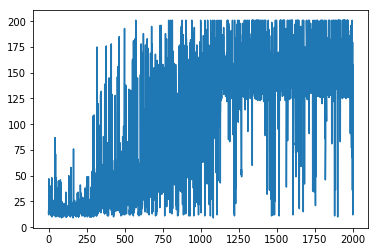

In [7]:
plt.plot(rewards)
plt.show()